## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.regularizers import l1,l1_l2
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [48]:

def build_mlp(input_shape , output_neurons = 10 , neurons = [256 , 256 , 256 , 128] , l1_ratio_p = 1e-5 , l2_ratio_p = 1e-4 , l1_l2_sel = False):
    """Code Here
    建立你的神經網路
    """
    inputs = keras.layers.Input(shape = input_shape)
    for i , neuron in enumerate(neurons):
      if i ==0:
        if l1_l2_sel == True:
          x = keras.layers.Dense(units = neuron , activation = 'relu' , kernel_regularizer = l1_l2(l1 = l1_ratio_p , l2 = l2_ratio_p))(inputs)
        else:
          x = keras.layers.Dense(units = neuron , activation = 'relu' , kernel_regularizer = keras.regularizers.l1(l1_ratio_p) )(inputs)
      else:
        if l1_l2_sel == False:
          x = keras.layers.Dense(units = neuron , activation = 'relu' , kernel_regularizer = keras.regularizers.l1(l1_ratio_p))(x)
        else:
          x = keras.layers.Dense(units = neuron , activation = 'relu' , kernel_regularizer = l1_l2(l1 = l1_ratio_p , l2 = l2_ratio_p))(x)
    
    if l1_l2_sel == False:
      outputs = keras.layers.Dense(units = output_neurons , activation = 'softmax' , kernel_regularizer = keras.regularizers.l1(l1_ratio_p))(x)
    else:
      outputs = keras.layers.Dense(units = output_neurons , activation = 'softmax' , kernel_regularizer = l1_l2(l1 = l1_ratio_p , l2 = l2_ratio_p))(x)

    model = keras.models.Model(inputs = [inputs] , outputs = [outputs])

    return model

In [43]:
"""Code Here
設定超參數
"""
epochs = 20
batch_size = 128
l1_ratio = [1e-2 , 1e-3 , 1e-4]
l2_ratio = [1e-2 , 1e-3 , 1e-4]

In [44]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for l1_z , l2_z in zip(l1_ratio , l2_ratio):
  keras.backend.clear_session()
  print('l1: ' , l1_z)
  print('l2: ' , l2_z)
  
  model = build_mlp(x_train.shape[1:] , l1_ratio_p = l1_z , l2_ratio_p = l2_z , l1_l2_sel = True)

  model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'])
  model.fit(x_train , y_train , epochs = epochs , batch_size = batch_size , validation_data = (x_test , y_test) , shuffle = True)

  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  results[0] = {'train-loss': train_loss,
                'valid-loss': valid_loss,
                'train-acc': train_acc,
                'valid-acc': valid_acc}

l1:  0.01
l2:  0.01
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 88us/step - loss: 20.7707 - acc: 0.1008 - val_loss: 3.4642 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 4s 80us/step - loss: 3.4543 - acc: 0.0982 - val_loss: 3.4385 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 4s 82us/step - loss: 3.4345 - acc: 0.0974 - val_loss: 3.4381 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 4s 81us/step - loss: 3.4431 - acc: 0.0990 - val_loss: 3.4436 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 4s 81us/step - loss: 3.4451 - acc: 0.0970 - val_loss: 3.4464 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 4s 81us/step - loss: 3.4646 - acc: 0.1002 - val_loss: 3.4823 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 4s 81us/step - loss: 3.4791 - acc: 0.0997 - val_l

In [49]:
for l1_z , l2_z in zip(l1_ratio , l2_ratio):
  keras.backend.clear_session()
  print('l1: ' , l1_z)
  print('l2: ' , l2_z)
  
  model = build_mlp(x_train.shape[1:] , l1_ratio_p = l1_z , l2_ratio_p = l2_z , l1_l2_sel = False)

  model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'])
  model.fit(x_train , y_train , epochs = epochs , batch_size = batch_size , validation_data = (x_test , y_test) , shuffle = True)

  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  results[1] = {'train-loss': train_loss,
                'valid-loss': valid_loss,
                'train-acc': train_acc,
                'valid-acc': valid_acc}


l1:  0.01
l2:  0.01
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 81us/step - loss: 19.6097 - acc: 0.1004 - val_loss: 3.4736 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 4s 77us/step - loss: 3.4740 - acc: 0.0974 - val_loss: 3.4732 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 4s 76us/step - loss: 3.4741 - acc: 0.0987 - val_loss: 3.4762 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 4s 77us/step - loss: 3.4742 - acc: 0.0978 - val_loss: 3.4727 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 4s 78us/step - loss: 3.4741 - acc: 0.0968 - val_loss: 3.4702 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 4s 77us/step - loss: 3.4741 - acc: 0.0968 - val_loss: 3.4759 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 4s 83us/step - loss: 3.4741 - acc: 0.0972 - val_l

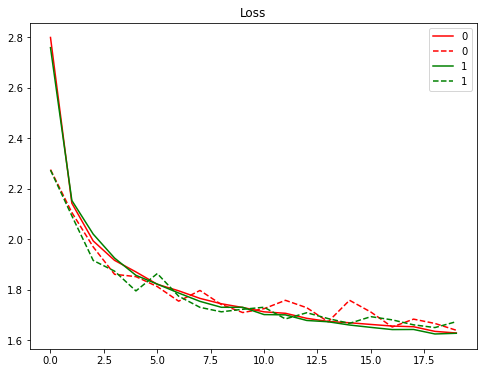

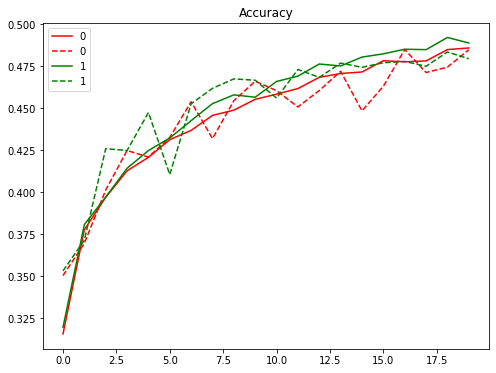

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))

for i , cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()